<a href="https://colab.research.google.com/github/ConfusedTraveler/credit_card_fraud_detection/blob/main/credit_card_fraud_detection_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Related Libraries and Settings

In [1]:
import numpy as np
import scipy as sp
from  scipy.stats import boxcox
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

# Exploratory Data Analysis

to get an general understanding of the data and its underlying structure

In [2]:
# 导入数据
transactions = pd.read_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/creditcard.csv')

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

没有缺失值，都是数值特征

In [5]:
# print("重复行的数量:", transactions.duplicated(keep=False).sum())

In [6]:
# print(transactions[transactions.duplicated(keep=False)])

In [7]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5594,5756.0,-1.069526,-0.149317,1.679008,-2.419008,0.789008,-0.217896,1.113164,-0.610826,3.102446,-1.261386,1.770795,-2.218999,-0.256065,0.999940,-1.659723,-0.664680,-0.093178,0.069016,-0.731440,-0.348998,-0.379733,-0.289215,-0.161039,-0.416205,-0.136385,-1.291803,-0.818651,-0.380878,45.01,0
207124,136529.0,-1.390876,-1.488362,-0.113717,-0.450636,1.751691,1.106916,-1.419957,1.244650,0.377102,-0.713029,0.265760,0.844030,-0.101813,0.342505,0.035990,-0.000181,-0.093062,-0.331742,-1.056404,0.168984,0.571704,1.103931,0.065073,-0.882680,-0.916083,0.547408,0.014433,-0.290198,17.85,0
196013,131320.0,-0.394126,0.439542,1.196228,-0.212446,-0.724469,0.603840,-0.330657,-1.470390,0.363274,-0.588734,0.539890,0.318908,-1.012112,0.596827,0.884820,0.367922,-0.578001,0.860108,0.893501,-0.343660,1.313985,-1.232941,-0.578731,-0.466315,1.281624,-0.544365,0.242259,0.128783,152.00,0
240840,150774.0,1.872374,-0.243315,-0.305309,1.613628,-0.461309,-0.286550,-0.223890,-0.007000,1.204117,-0.024203,-1.289836,0.648704,-0.410033,-0.215697,-1.144230,-0.472569,0.020802,-0.944213,0.132490,-0.258324,-0.504294,-1.215333,0.423424,-0.102113,-0.350842,-1.104367,0.051497,-0.026402,34.97,0
203874,135012.0,-1.214647,0.657778,-0.902662,-0.187455,1.037103,-0.668108,2.201905,-0.545738,-0.626496,0.096950,0.270952,-0.184355,-1.288125,0.883870,-1.057853,0.140463,-1.117562,0.273335,-0.657714,-0.981496,0.132710,0.836491,0.073432,-0.407096,-0.107311,-0.716597,-0.068058,0.057307,152.97,0


In [8]:
print('Number of legitimate transactions:',transactions['Class'].value_counts()[0])
print('Number of fraudulent transactions:',transactions['Class'].value_counts()[1])
print('Legitimate transactions:',round(transactions['Class'].value_counts()[0]/len(transactions)*100,3),'% of the dataset')
print('Fraudulent transactions:',round(transactions['Class'].value_counts()[1]/len(transactions)*100,3),'% of the dataset')

Number of legitimate transactions: 284315
Number of fraudulent transactions: 492
Legitimate transactions: 99.827 % of the dataset
Fraudulent transactions: 0.173 % of the dataset


In [9]:

# 计算总金额
total_amount = transactions['Amount'].sum()

# 计算欺诈交易的金额
fraud_amount = transactions[transactions['Class'] == 1]['Amount'].sum()

# 计算欺诈交易金额占总金额的比例
fraud_percentage = (fraud_amount / total_amount) * 100

# 计算欺诈交易的平均金额
fraud_mean_amount = fraud_amount / transactions[transactions['Class'] == 1]['Amount'].count()

# 计算合法交易的平均金额
legit_mean_amount = transactions[transactions['Class'] == 0]['Amount'].mean()

# 输出结果
print(f"欺诈交易的总金额: {fraud_amount}")
print(f"所有交易的总金额: {total_amount}")
print(f"欺诈交易金额占总金额的百分比: {fraud_percentage:.2f}%")
print(f"欺诈交易的平均金额: {fraud_mean_amount:.2f}")
print(f"合法交易的平均金额: {legit_mean_amount:.2f}")

欺诈交易的总金额: 60127.97
所有交易的总金额: 25162590.009999998
欺诈交易金额占总金额的百分比: 0.24%
欺诈交易的平均金额: 122.21
合法交易的平均金额: 88.29


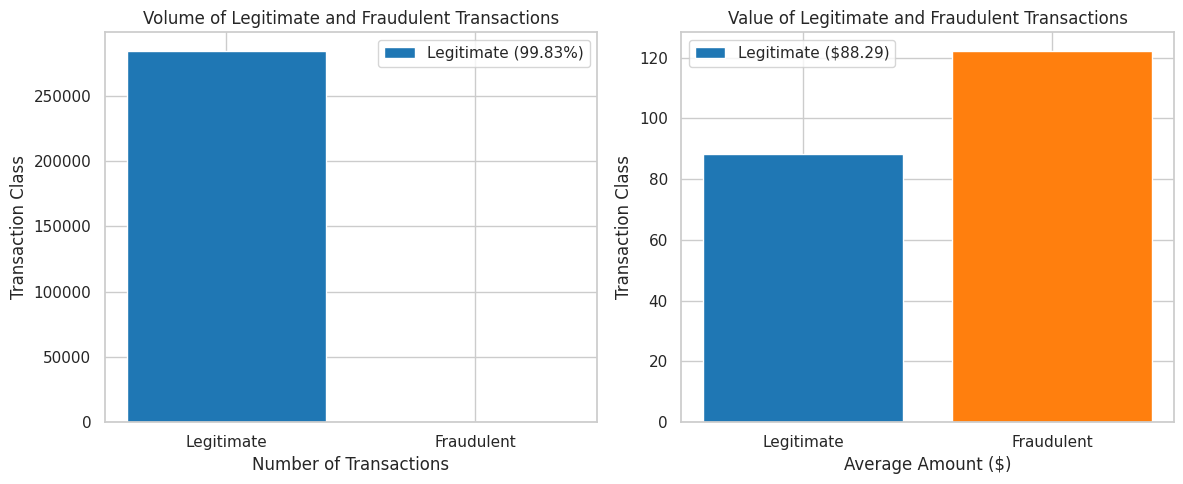

In [10]:
# Picture: Volume of legitimate transactions and fraudulent transactions
# 计算合法和欺诈交易的数量
legitimate_count = transactions[transactions['Class'] == 0].shape[0]
fraud_count = transactions[transactions['Class'] == 1].shape[0]

# 计算总交易数量
total_count = legitimate_count + fraud_count

# 计算合法和欺诈交易的总金额
legitimate_amount = transactions[transactions['Class'] == 0]['Amount'].sum()
fraud_amount = transactions[transactions['Class'] == 1]['Amount'].sum()

# 计算总交易金额
total_amount = total_amount = legitimate_amount + fraud_amount

# 计算平均金额
legitimate_avg = legitimate_amount / legitimate_count
fraud_avg = fraud_amount / fraud_count

# 创建一个包含两个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 第一个图：交易数量
axs[0].bar(['Legitimate', 'Fraudulent'], [legitimate_count, fraud_count], color=['#1f77b4', '#ff7f0e'])
axs[0].set_title('Volume of Legitimate and Fraudulent Transactions')

# 计算占比并添加到图例
legitimate_percentage = (legitimate_count / total_count) * 100
fraud_percentage = (fraud_count / total_count) * 100
axs[0].set_xlabel('Number of Transactions')
axs[0].set_ylabel('Transaction Class')
axs[0].legend(['Legitimate ({:.2f}%)'.format(legitimate_percentage), 'Fraudulent ({:.2f}%)'.format(fraud_percentage)])

# 第二个图：交易金额占比
axs[1].bar(['Legitimate', 'Fraudulent'], [legitimate_avg, fraud_avg], color=['#1f77b4', '#ff7f0e'])
axs[1].set_title('Value of Legitimate and Fraudulent Transactions')
axs[1].set_xlabel('Average Amount ($)')
axs[1].set_ylabel('Transaction Class')
axs[1].legend(['Legitimate (${})'.format(round(legitimate_avg, 2)), 'Fraudulent (${})'.format(round(fraud_avg, 2))])

# 自动调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

In [11]:
# Picture: Value of legitimate transactions and fraudulent transactions

# Data Preparation

## feature engineering
* 处理time和amount这两个特征，其他特征已经使用PCA处理过


In [12]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
'''
# 移除响应变量'Class'列
transactions_features = transactions.drop(columns=['Class'])

# 计算所有剩余数值型特征的均值
mean_values = transactions_features.mean()

# 将均值四舍五入到两位小数
mean_values_rounded = mean_values.round(10)

# 将结果转换为表格形式显示，并设置合适的列名
mean_values_rounded = mean_values_rounded.reset_index()
mean_values_rounded.columns = ['Feature', 'Mean']

# 输出表格
print(mean_values_rounded)
'''

"\n# 移除响应变量'Class'列\ntransactions_features = transactions.drop(columns=['Class'])\n\n# 计算所有剩余数值型特征的均值\nmean_values = transactions_features.mean()\n\n# 将均值四舍五入到两位小数\nmean_values_rounded = mean_values.round(10)\n\n# 将结果转换为表格形式显示，并设置合适的列名\nmean_values_rounded = mean_values_rounded.reset_index()\nmean_values_rounded.columns = ['Feature', 'Mean']\n\n# 输出表格\nprint(mean_values_rounded)\n"

In [14]:
transactions['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [15]:
transactions['Time'] = transactions['Time'] / 3600

In [16]:
transactions['Time'].describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time, dtype: float64

plot a histogram of transaction times, with one bin per hour

Text(0.5, 1.0, 'Transaction Times for Fraudulent Transactions')

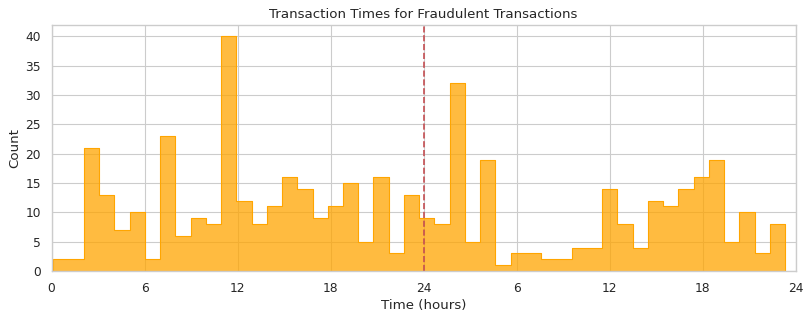

In [17]:
# 设置图形的大小和分辨率
plt.figure(figsize=(12, 4), dpi=80)

# 为欺诈交易绘制直方图（Class 为 1）
sns.histplot(transactions[transactions['Class'] == 1]['Time'], bins=48, element='step', color='orange')

# 设置X轴的显示范围和刻度
plt.xlim([0, 48])
plt.xticks(np.arange(0, 49, 6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))

# 添加红色的虚线，表示特定的时间点（例如24小时处）
plt.axvline(x=24, color='r', linestyle='--')

# 添加标签和标题
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times for Fraudulent Transactions')

Text(0.5, 1.0, 'Transaction Times for Legitimate Transactions')

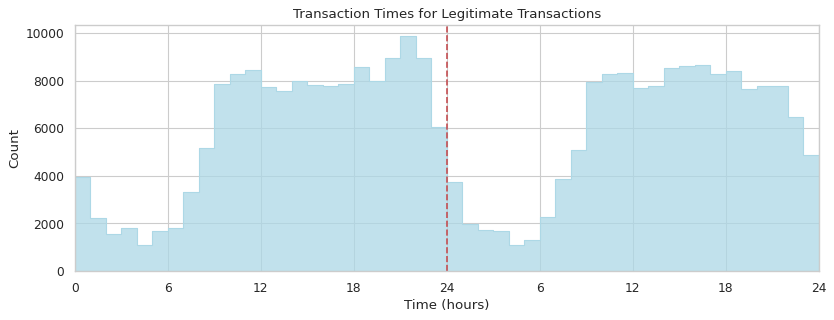

In [18]:
# 设置图形的大小和分辨率
plt.figure(figsize=(12, 4), dpi=80)

# 为合法交易绘制直方图（Class 为 0）
sns.histplot(transactions[transactions['Class'] == 0]['Time'], bins=48, element='step', color='lightblue')

# 设置X轴的显示范围和刻度
plt.xlim([0, 48])
plt.xticks(np.arange(0, 49, 6), np.hstack((np.arange(0, 30, 6), np.arange(6, 30, 6))).astype(str))

# 添加红色的虚线，表示特定的时间点（例如24小时处）
plt.axvline(x=24, color='r', linestyle='--')

# 添加标签和标题
plt.xlabel('Time (hours)')
plt.ylabel('Count')
plt.title('Transaction Times for Legitimate Transactions')

In [19]:
transactions['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

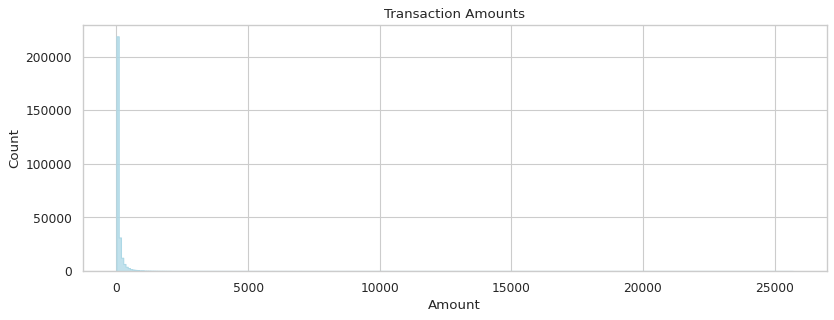

In [20]:
# picture: amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], bins=300, element='step', color='lightblue')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

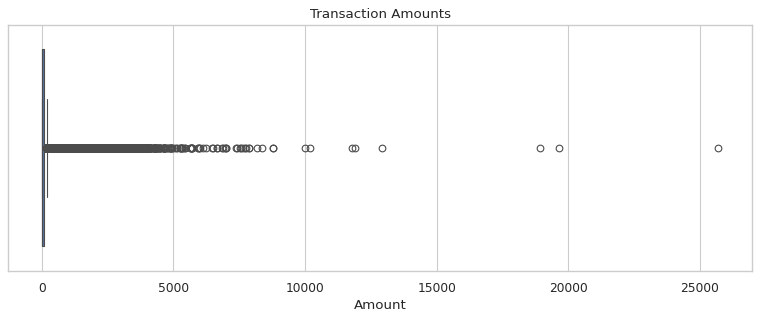

In [21]:
# The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers.
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x=transactions['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right.So the amounts certainly seem right-skewed.

In [22]:
transactions['Amount'].skew()

16.977724453761024

amount最小值是0

In [23]:
transactions['Amount'] = transactions['Amount'] + 1e-9

In [24]:
transactions['Amount'], maxlog, (min_ci,max_ci) = boxcox(transactions['Amount'], alpha=0.01)

In [25]:
maxlog

0.13392240552999146

In [26]:
(min_ci,max_ci)

(0.132621597858576, 0.13523057944346129)

In [27]:
transactions['Amount'].describe()

count    284807.000000
mean          3.977690
std           2.961936
min          -7.001590
25%           1.937710
50%           3.829056
75%           5.896318
max          21.621106
Name: Amount, dtype: float64

In [28]:
transactions['Amount'].skew()

0.1153579081322187

In [29]:
transactions['Amount'] = np.abs(transactions['Amount'])

In [30]:
transactions['Amount'].describe()

count    2.848070e+05
mean     4.110236e+00
std      2.775075e+00
min      1.000000e-09
25%      2.041862e+00
50%      3.889874e+00
75%      5.958797e+00
max      2.162111e+01
Name: Amount, dtype: float64

In [31]:
transactions['Amount'].skew()

0.5087385510850546

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

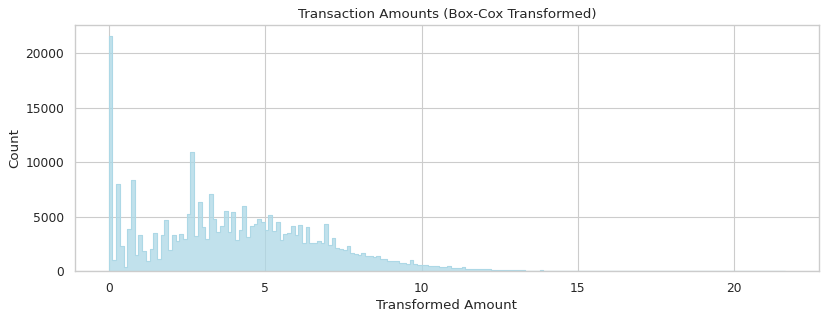

In [32]:
# picture: transformed amount分布
plt.figure(figsize=(12,4), dpi=80)
sns.histplot(transactions['Amount'], element='step', color='lightblue')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

Text(0.5, 1.0, 'Transaction Amounts')

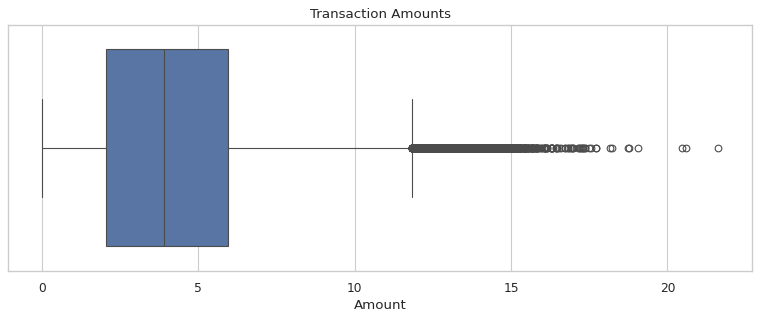

In [33]:
# The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers.
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(x=transactions['Amount'])
plt.title('Transaction Amounts')

## feature selection

### heatmap

<Axes: title={'center': 'features correlation plot'}>

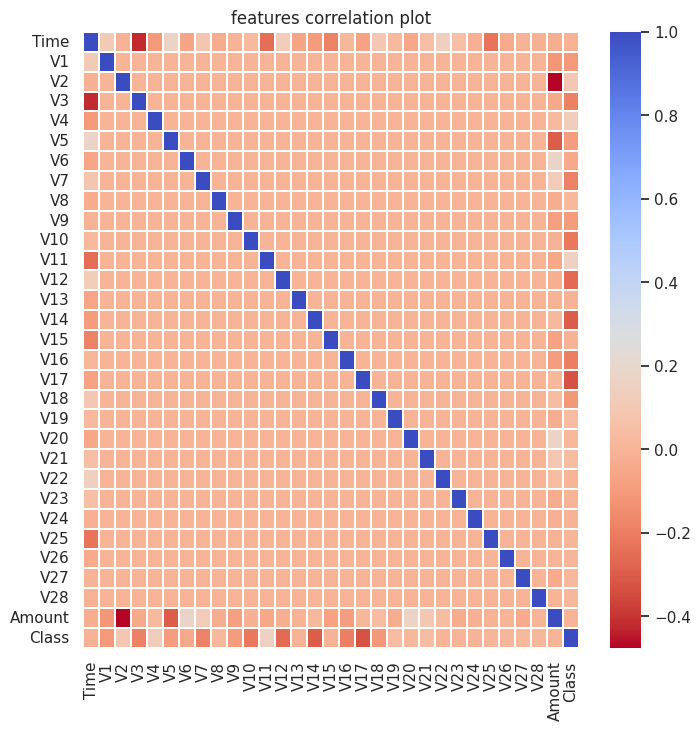

In [34]:
plt.figure(figsize = (8,8))
plt.title('features correlation plot')
corr = transactions.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm_r")

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (inverse correlation with V2 and V5).
但根据相关系数，各变量之间的相关性都不是特别强

In [35]:
print(corr['Time'])

Time      1.000000
V1        0.117396
V2       -0.010593
V3       -0.419618
V4       -0.105260
V5        0.173072
V6       -0.063016
V7        0.084714
V8       -0.036949
V9       -0.008660
V10       0.030617
V11      -0.247689
V12       0.124348
V13      -0.065902
V14      -0.098757
V15      -0.183453
V16       0.011903
V17      -0.073297
V18       0.090438
V19       0.028975
V20      -0.050866
V21       0.044736
V22       0.144059
V23       0.051142
V24      -0.016182
V25      -0.233083
V26      -0.041407
V27      -0.005135
V28      -0.009413
Amount   -0.030963
Class    -0.012323
Name: Time, dtype: float64


In [36]:
print(corr['Amount'])

Time     -0.030963
V1       -0.115847
V2       -0.475616
V3       -0.047434
V4        0.028500
V5       -0.301764
V6        0.177517
V7        0.120657
V8       -0.030618
V9       -0.079078
V10      -0.012093
V11      -0.051605
V12      -0.021512
V13      -0.003836
V14       0.024761
V15      -0.077768
V16      -0.093121
V17       0.012149
V18       0.040118
V19      -0.028834
V20       0.170844
V21       0.089399
V22       0.042878
V23      -0.037161
V24      -0.015280
V25      -0.003112
V26      -0.002919
V27      -0.042084
V28      -0.000307
Amount    1.000000
Class    -0.000096
Name: Amount, dtype: float64


In [37]:
print(corr['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount   -0.000096
Class     1.000000
Name: Class, dtype: float64


Class: inverse correlation with V14 and V17，但相关性也不是特别强

## train-test split

In [38]:
# train-test split
X = transactions.drop(columns='Class')
y = transactions['Class']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
del X, y

In [41]:
y_train.value_counts()

Class
0    199020
1       344
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Class
0    85295
1      148
Name: count, dtype: int64

In [43]:
print('Fraudulent transactions:',round(y_test.value_counts()[1]/len(y_test)*100,3),'% of the dataset')

Fraudulent transactions: 0.173 % of the dataset


## class imbalance

In [ ]:
'''
# class imbalance
from imblearn.combine import SMOTEENN

# 定义SMOTEENN对象
smote_enn = SMOTEENN(random_state=1)

# 应用SMOTEENN进行类别平衡
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# 现在X_resampled和y_resampled是平衡后的特征矩阵和标签向量
'''

In [44]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/out.csv',index_col=0)
X_resampled = df.drop(columns='Class')
y_resampled = df['Class']

In [45]:
# 计算重采样后各类别的数量
y_resampled.value_counts()

Class
1    199020
0    198580
Name: count, dtype: int64

In [46]:
X_resampled.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
162046,34.410556,-3.218012,-4.934596,0.781687,-0.659681,2.528983,-2.189439,-1.111196,0.151549,1.284598,-0.897735,-1.125432,-0.668418,-1.169830,0.061405,1.237997,0.254447,-0.603116,0.591853,-0.191693,1.716208,0.660250,0.269860,1.393037,0.570601,0.186147,0.654167,-0.481502,-0.144578,9.035735e+00
395572,13.358761,-3.671246,2.180398,-5.538800,6.339708,3.704555,-3.452805,-2.854224,-0.436775,-4.390631,-5.172992,5.728022,-5.850622,-1.986243,-10.916602,-0.189646,-1.361840,-0.355112,0.686974,-1.261017,0.343313,-0.083204,0.065770,-0.715011,-0.445503,0.653788,0.547790,0.616176,0.825231,1.000000e-09
24015,14.641944,-1.245961,0.286205,0.176089,0.049932,-0.317078,-0.409305,1.309978,0.164003,-1.081983,-0.784611,-1.324169,-0.850661,-0.538175,0.911215,1.301713,-0.134689,0.156214,0.119973,1.566375,0.617151,0.154765,-0.227379,0.169570,-0.412627,0.541869,1.298084,-0.257145,-0.048998,8.166321e+00
171616,16.482500,-3.446316,1.798817,0.355825,0.028567,-1.639035,-1.607048,-1.307742,1.441568,0.127174,0.452521,-0.281218,0.265300,-0.418375,0.989999,1.723613,0.150090,0.815815,-0.213169,0.891504,0.064744,-0.183325,-0.386957,-0.438423,1.007990,0.013755,1.059662,0.133267,-0.405648,8.859909e-01
384084,43.154168,-1.065504,5.258956,-8.429326,7.315503,0.013492,-2.124497,-3.301342,1.864851,-4.524982,-5.175109,5.592222,-5.643134,0.783541,-12.046126,0.354232,-1.922466,-1.881340,0.679905,0.799327,0.821693,0.547898,-0.490991,0.053995,-1.145226,0.068141,0.535160,0.540522,0.125749,2.568434e-01


In [ ]:
'''
df = pd.concat([X_resampled,y_resampled],axis=1)
df.sample(5)
'''

In [ ]:
'''
import os

os.makedirs('/content/drive/MyDrive/credit_card_fraud_detection/data/', exist_ok=True)

df.to_csv('/content/drive/MyDrive/credit_card_fraud_detection/data/out.csv')
'''

# Model Selection, Data Modelling and Model Evaluation

计算 Recall Precision F1-Score MCC AUC-PR

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from joblib import dump, load

In [48]:
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

## bagging

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier()
param_dist = {
    'n_estimators': [10,30,50,70],
    'max_samples': [0.1,0.4,0.7,1.0],
    'max_features': [0.1,0.4,0.7,1.0]
}

In [50]:
random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(base_estimator),
    param_distributions=param_dist,
    n_iter=10,  # 这里设置了一个迭代次数，可以根据计算资源进行调整
    cv=3,        # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [51]:
random_search.fit(X_resampled, y_resampled)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


执行时间：1h

In [52]:
random_search.best_params_

{'n_estimators': 70, 'max_samples': 0.7, 'max_features': 0.4}

In [53]:
best_model = load('/content/drive/MyDrive/credit_card_fraud_detection/model/bagging.joblib')

In [ ]:
dump(best_model, '/content/drive/MyDrive/credit_card_fraud_detection/model/bagging.joblib')

In [54]:
y_pred = best_model.predict(X_test)

Text(46.25, 0.5, 'True')

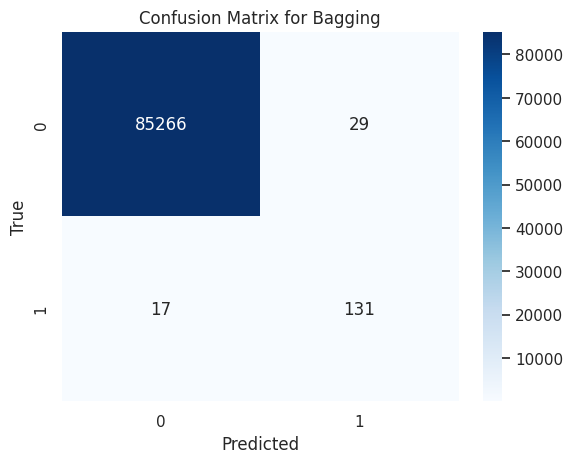

In [55]:
# (a) 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Bagging')
plt.xlabel('Predicted')
plt.ylabel('True')

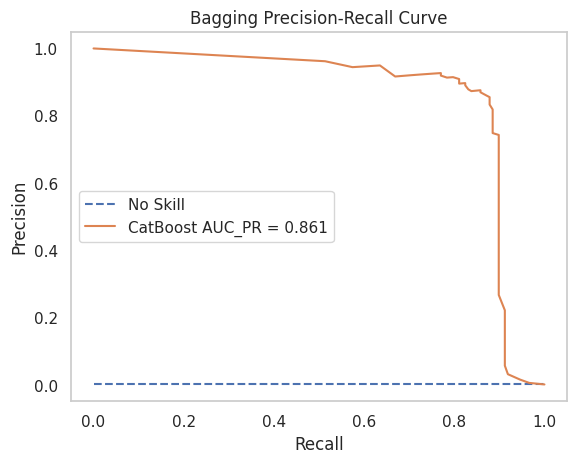

In [56]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
auc_pr_bag = auc(recall, precision)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, label='CatBoost AUC_PR = %0.3f' % auc_pr_bag)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Bagging Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

## random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
# 定义随机森林分类器的基础估计器
base_model = RandomForestClassifier()

# 定义参数的搜索空间，使用常用的离散值
param_dist_rf = {
    'n_estimators': [10,30,50,70],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 创建RandomizedSearchCV实例
random_search_rf = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)


In [58]:
random_search_rf.fit(X_resampled, y_resampled)
best_model_rf = random_search_rf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


执行时间：34min

In [59]:
random_search_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
# dump(best_model_rf, '/content/drive/MyDrive/credit_card_fraud_detection/model/rf.joblib')

In [60]:
best_model_rf = load('/content/drive/MyDrive/credit_card_fraud_detection/model/rf.joblib')

In [61]:
y_pred_rf = best_model_rf.predict(X_test)

Text(46.25, 0.5, 'True')

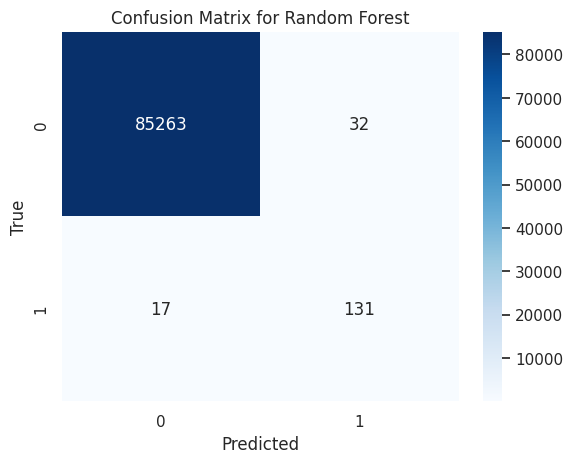

In [62]:
# (a) 绘制混淆矩阵
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

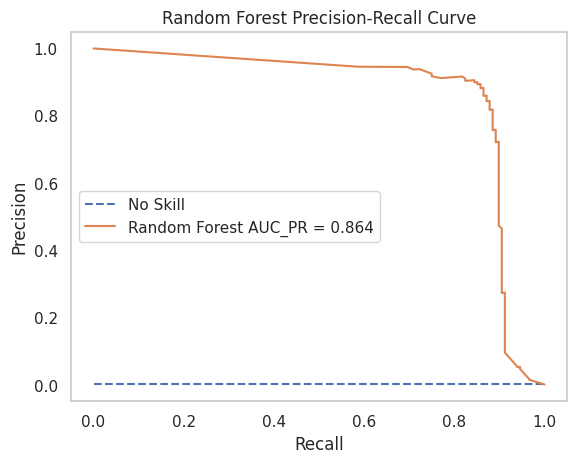

In [63]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_rf, recall_rf, _ = precision_recall_curve(y_test, best_model_rf.predict_proba(X_test)[:, 1])
auc_pr_rf = auc(recall_rf, precision_rf)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_rf, precision_rf, label='Random Forest AUC_PR = %0.3f' % auc_pr_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-64-2be7c4449baf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


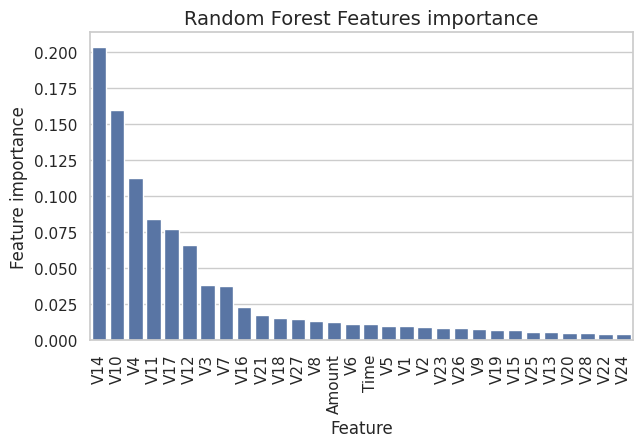

In [64]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Random Forest Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## XGBoost

In [ ]:
# pip install xgboost

In [ ]:
# XGBoost
import xgboost as xgb

# 定义XGBoost模型
base_model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 定义参数的搜索空间
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# 创建RandomizedSearchCV实例
random_search_xgb = RandomizedSearchCV(
    estimator=base_model_xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_xgb.fit(X_resampled, y_resampled)
best_model_xgb = random_search_xgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


执行时间：5分钟

In [ ]:
random_search_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [ ]:
dump(best_model_xgb, '/content/drive/MyDrive/credit_card_fraud_detection/model/xgb.joblib')

In [ ]:
best_model_xgb = load('/content/drive/MyDrive/credit_card_fraud_detection/model/xgb.joblib')

In [ ]:
y_pred_xgb = best_model_xgb.predict(X_test)

Text(46.25, 0.5, 'True')

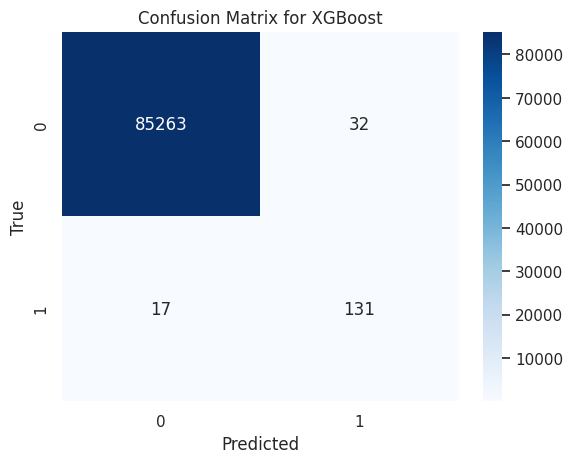

In [ ]:
# (a) 绘制混淆矩阵
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')

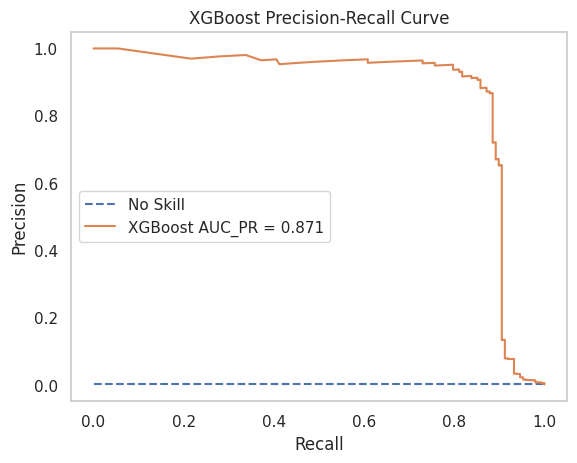

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, best_model_xgb.predict_proba(X_test)[:, 1])
auc_pr_xgb = auc(recall_xgb, precision_xgb)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_xgb, precision_xgb, label='XGBoost AUC_PR = %0.3f' % auc_pr_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-61-8e69c3b27be6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


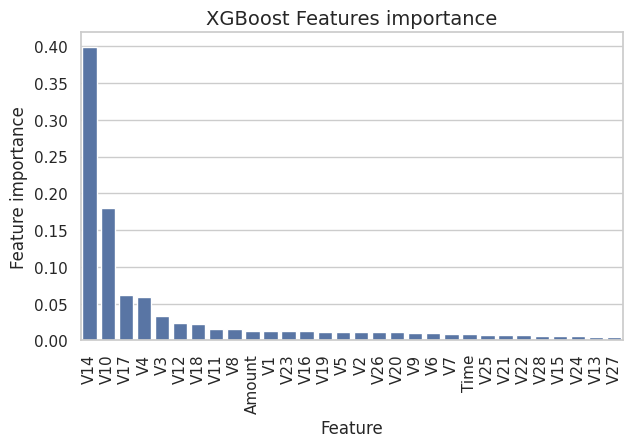

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('XGBoost Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## LightGBM

In [ ]:
# pip install lightgbm

In [ ]:
# LightGBM
import lightgbm as lgb

# 定义LightGBM模型
base_model_lgb = lgb.LGBMClassifier()

# 定义参数的搜索空间
param_dist_lgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 9],
    'max_bin': [100, 200, 300, 500],
    'min_data_in_leaf': [20, 40, 60, 80],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'num_leaves': [31, 63, 127, 255],
    # 'colsample_by_tree': [0.5, 0.6, 0.7, 0.8]
}

# 创建RandomizedSearchCV实例
random_search_lgb = RandomizedSearchCV(
    estimator=base_model_lgb,
    param_distributions=param_dist_lgb,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_lgb.fit(X_resampled, y_resampled)
best_model_lgb = random_search_lgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Number of positive: 199020, number of negative: 198580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.220998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15000
[LightGBM] [Info] Number of data points in the train set: 397600, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500553 -> initscore=0.002213
[LightGBM] [Info] Start training from score 0.002213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

执行时间：4分钟

In [ ]:
random_search_lgb.best_params_

{'subsample': 1.0,
 'num_leaves': 255,
 'n_estimators': 400,
 'min_data_in_leaf': 80,
 'max_depth': 7,
 'max_bin': 500,
 'learning_rate': 0.3}

In [ ]:
dump(best_model_lgb, '/content/drive/MyDrive/credit_card_fraud_detection/model/lgb.joblib')

In [ ]:
best_model_lgb = load('/content/drive/MyDrive/credit_card_fraud_detection/model/lgb.joblib')

In [ ]:
y_pred_lgb = best_model_lgb.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


Text(46.25, 0.5, 'True')

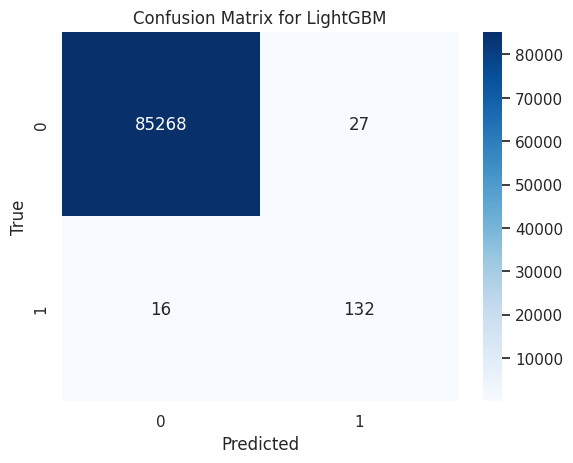

In [ ]:
# (a) 绘制混淆矩阵
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


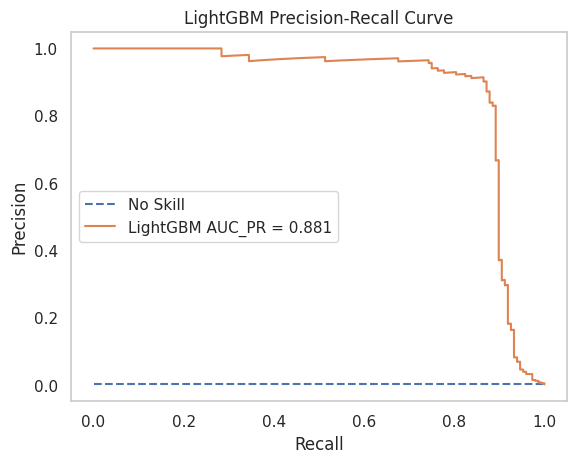

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, best_model_lgb.predict_proba(X_test)[:, 1])
auc_pr_lgb = auc(recall_lgb, precision_lgb)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_lgb, precision_lgb, label='LightGBM AUC_PR = %0.3f' % auc_pr_lgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-69-667c4c0330af>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


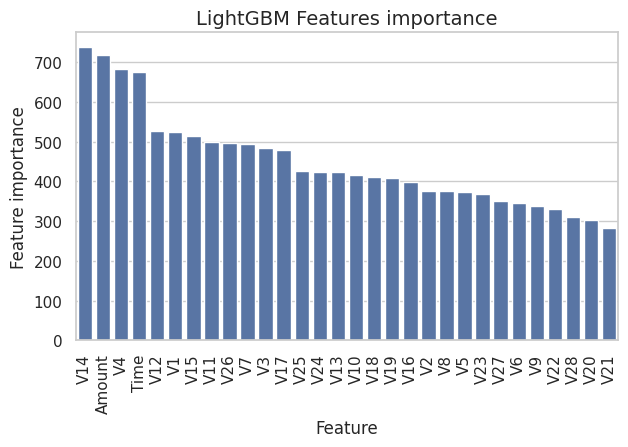

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_lgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('LightGBM Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## CatBoost

In [ ]:
pip install catboost

In [ ]:
# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV

# 定义CatBoost模型
base_model_cbt = CatBoostClassifier()

# 定义参数的搜索空间
param_dist_cbt = {
    'iterations': [100, 500, 1000, 2000],  # 常用的迭代次数
    'depth': [3, 4, 5, 6],  # 树的最大深度
    'learning_rate': [0.1, 0.2, 0.3, 0.4],  # 学习率
    'l2_leaf_reg': [0.5, 1.0, 1.5, 2.0]  # 控制过拟合的正则化参数
}

# 创建RandomizedSearchCV实例
random_search_cbt = RandomizedSearchCV(
    estimator=base_model_cbt,
    param_distributions=param_dist_cbt,
    n_iter=10,  # 可以根据您的计算资源调整迭代次数
    cv=3,  # 交叉验证的折数
    verbose=1,
    random_state=1,
    n_jobs=-1  # 使用所有可用的CPU核心进行并行计算
)

In [ ]:
random_search_cbt.fit(X_resampled,y_resampled)
best_model_cbt = random_search_cbt.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0:	learn: 0.3644439	total: 176ms	remaining: 2m 55s
1:	learn: 0.2442457	total: 296ms	remaining: 2m 27s
2:	learn: 0.1921890	total: 409ms	remaining: 2m 16s
3:	learn: 0.1568457	total: 520ms	remaining: 2m 9s
4:	learn: 0.1321449	total: 664ms	remaining: 2m 12s
5:	learn: 0.1191198	total: 771ms	remaining: 2m 7s
6:	learn: 0.1094294	total: 882ms	remaining: 2m 5s
7:	learn: 0.0993026	total: 989ms	remaining: 2m 2s
8:	learn: 0.0948497	total: 1.1s	remaining: 2m 1s
9:	learn: 0.0904871	total: 1.21s	remaining: 1m 59s
10:	learn: 0.0868940	total: 1.31s	remaining: 1m 58s
11:	learn: 0.0775898	total: 1.43s	remaining: 1m 57s
12:	learn: 0.0737568	total: 1.54s	remaining: 1m 56s
13:	learn: 0.0688568	total: 1.67s	remaining: 1m 57s
14:	learn: 0.0634684	total: 1.84s	remaining: 2m
15:	learn: 0.0606932	total: 2.04s	remaining: 2m 5s
16:	learn: 0.0567272	total: 2.26s	remaining: 2m 10s
17:	learn: 0.0535932	total: 2.47s	remaining: 2m 14s
18:	learn: 0.0507138	total: 2.69s	remaining: 2m 18s
19:	learn: 0.0486694	total: 2.88s

执行时间是：44min

In [ ]:
random_search_cbt.best_params_

{'learning_rate': 0.2, 'l2_leaf_reg': 1.5, 'iterations': 1000, 'depth': 6}

In [ ]:
dump(best_model_cbt, '/content/drive/MyDrive/credit_card_fraud_detection/model/cbt.joblib')

In [ ]:
best_model_cbt = load('/content/drive/MyDrive/credit_card_fraud_detection/model/cbt.joblib')

In [ ]:
test_pool = Pool(X_test,y_test)
y_pred_cbt = best_model_cbt.predict(test_pool)

Text(46.25, 0.5, 'True')

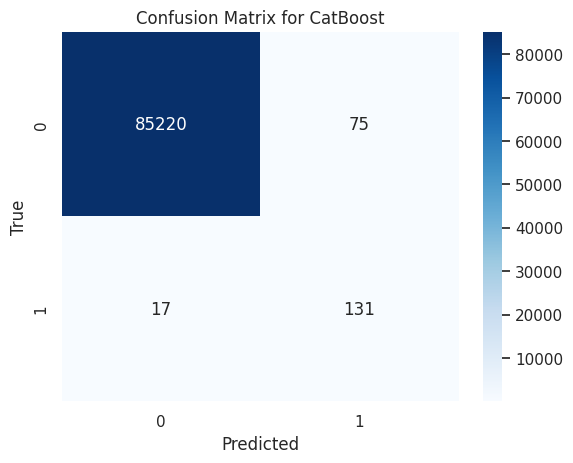

In [ ]:
# (a) 绘制混淆矩阵
cm_cbt = confusion_matrix(y_test, y_pred_cbt)
sns.heatmap(cm_cbt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')

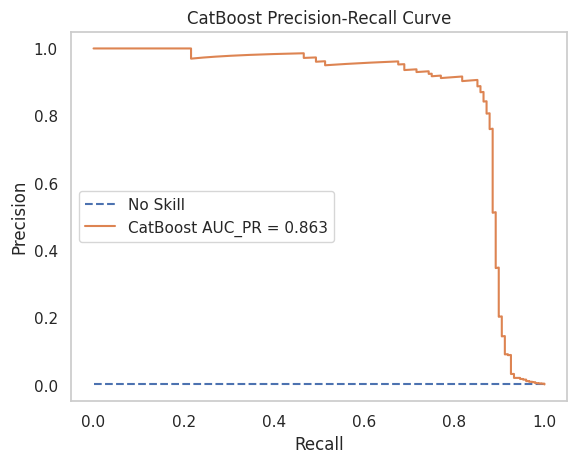

In [ ]:
# (b) 计算Precision-Recall AUC并绘制曲线
precision_cbt, recall_cbt, _ = precision_recall_curve(y_test, best_model_cbt.predict_proba(X_test)[:, 1])
auc_pr_cbt = auc(recall_cbt, precision_cbt)
plt.figure()
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_cbt, precision_cbt, label='CatBoost AUC_PR = %0.3f' % auc_pr_cbt)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision-Recall Curve')
plt.legend(loc='center left')
plt.grid(False)

<ipython-input-78-ce4aeadfb9fb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


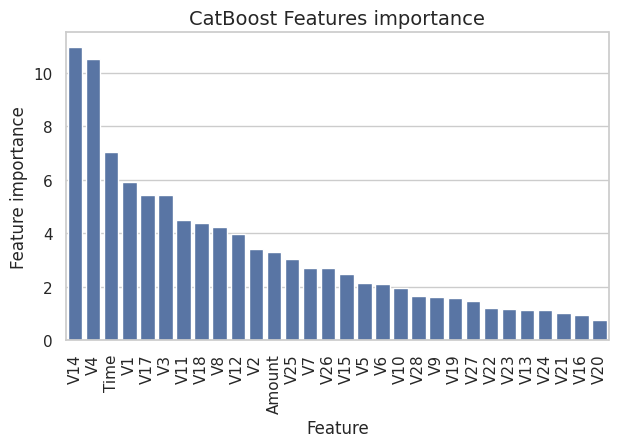

In [ ]:
# (c) 绘制特征重要性
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': best_model_cbt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('CatBoost Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

## 评估

In [65]:
# 计算 Recall
recall = recall_score(y_test.values, y_pred)
recall_str = f"{recall:.3f}"

# 计算 Precision
precision = precision_score(y_test.values, y_pred)
precision_str = f"{precision:.3f}"

# 计算 F1-Score
f1 = f1_score(y_test.values, y_pred)
f1_str = f"{f1:.3f}"

# 计算 MCC
mcc = matthews_corrcoef(y_test.values, y_pred)
mcc_str = f"{mcc:.3f}"

print(f"Recall: {recall_str}")
print(f"Precision: {precision_str}")
print(f"F1-Score: {f1_str}")
print(f"MCC: {mcc_str}")

Recall: 0.885
Precision: 0.819
F1-Score: 0.851
MCC: 0.851


In [66]:
# 计算 Recall
recall = recall_score(y_test.values, y_pred_rf)
recall_str = f"{recall:.3f}"

# 计算 Precision
precision = precision_score(y_test.values, y_pred_rf)
precision_str = f"{precision:.3f}"

# 计算 F1-Score
f1 = f1_score(y_test.values, y_pred_rf)
f1_str = f"{f1:.3f}"

# 计算 MCC
mcc = matthews_corrcoef(y_test.values, y_pred_rf)
mcc_str = f"{mcc:.3f}"

print(f"Recall: {recall_str}")
print(f"Precision: {precision_str}")
print(f"F1-Score: {f1_str}")
print(f"MCC: {mcc_str}")

Recall: 0.885
Precision: 0.804
F1-Score: 0.842
MCC: 0.843


In [ ]:
# 计算 Recall
recall = recall_score(y_test.values, y_pred_xgb)
recall_str = f"{recall:.3f}"

# 计算 Precision
precision = precision_score(y_test.values, y_pred_xgb)
precision_str = f"{precision:.3f}"

# 计算 F1-Score
f1 = f1_score(y_test.values, y_pred_xgb)
f1_str = f"{f1:.3f}"

# 计算 MCC
mcc = matthews_corrcoef(y_test.values, y_pred_xgb)
mcc_str = f"{mcc:.3f}"

print(f"Recall: {recall_str}")
print(f"Precision: {precision_str}")
print(f"F1-Score: {f1_str}")
print(f"MCC: {mcc_str}")

Recall: 0.885
Precision: 0.804
F1-Score: 0.842
MCC: 0.843


In [ ]:
# 计算 Recall
recall = recall_score(y_test.values, y_pred_lgb)
recall_str = f"{recall:.3f}"

# 计算 Precision
precision = precision_score(y_test.values, y_pred_lgb)
precision_str = f"{precision:.3f}"

# 计算 F1-Score
f1 = f1_score(y_test.values, y_pred_lgb)
f1_str = f"{f1:.3f}"

# 计算 MCC
mcc = matthews_corrcoef(y_test.values, y_pred_lgb)
mcc_str = f"{mcc:.3f}"

print(f"Recall: {recall_str}")
print(f"Precision: {precision_str}")
print(f"F1-Score: {f1_str}")
print(f"MCC: {mcc_str}")

Recall: 0.892
Precision: 0.830
F1-Score: 0.860
MCC: 0.860


In [ ]:
# 计算 Recall
recall = recall_score(y_test.values, y_pred_cbt)
recall_str = f"{recall:.3f}"

# 计算 Precision
precision = precision_score(y_test.values, y_pred_cbt)
precision_str = f"{precision:.3f}"

# 计算 F1-Score
f1 = f1_score(y_test.values, y_pred_cbt)
f1_str = f"{f1:.3f}"

# 计算 MCC
mcc = matthews_corrcoef(y_test.values, y_pred_cbt)
mcc_str = f"{mcc:.3f}"

print(f"Recall: {recall_str}")
print(f"Precision: {precision_str}")
print(f"F1-Score: {f1_str}")
print(f"MCC: {mcc_str}")

Recall: 0.885
Precision: 0.636
F1-Score: 0.740
MCC: 0.750
